<a href="https://colab.research.google.com/github/skywalker0803r/works/blob/master/%E8%BC%95%E6%B2%B9%E6%A1%88%E5%AD%90%E5%8F%AF%E8%A6%96%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import warnings;warnings.simplefilter('ignore')
drive.mount('/content/drive')
from sklearn.manifold import Isomap
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# load

In [0]:
train = pd.read_csv('/content/drive/My Drive/台塑輕油案子/data/train_4521.csv',index_col=0)
train['tag'] = 'train'
test_250 = pd.read_csv('/content/drive/My Drive/台塑輕油案子/data/test_250.csv',index_col=0)
test_250['tag'] = 'test_250'
test_170 = pd.read_csv('/content/drive/My Drive/台塑輕油案子/data/test_170.csv',index_col=0)
test_170['tag'] = 'test_170'
test_200 = test_250[test_250.index %5 != 0]
test_200['tag'] = 'test_200'
test_50 = test_250[test_250.index %5 == 0]
test_50['tag'] = 'test_50'

In [0]:
full = train.append(test_200).append(test_170).append(test_50)

# features y_columns

In [4]:
def f(x):
  if 'NP' in x:
    return x.replace('NP','IP')
  if 'IP' in x:
    return x.replace('IP','NP')
  else:
    return x
cols = train.columns.tolist()
features = cols[:4]
y_columns = cols[4:]
y_columns = [f(i) for i in y_columns]
print(features)
print(y_columns)

['T10', 'T50', 'T90', 'N+A']
['C5IP', 'C5NP', 'C5N', 'C6IP', 'C6NP', 'C6N', 'C6A', 'C7IP', 'C7NP', 'C7N', 'C7A', 'C8IP', 'C8NP', 'C8N', 'C8A', 'C9IP', 'C9NP', 'C9N', 'C9A', 'C10IP', 'C10NP', 'C10N', 'C10A', 'tag']


# scaler

In [0]:
scaler = StandardScaler().fit(full[features])
full[features] = scaler.transform(full[features])

# isomap

In [0]:
iso_col = features
iso = Isomap(n_components=2).fit(full[iso_col])
#full
temp = iso.transform(full[iso_col])
full['iso1'] = temp[:,0] 
full['iso2'] = temp[:,1]

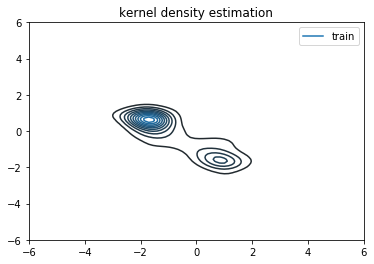

In [7]:
sns.kdeplot(full.loc[full.tag=='train',['iso1','iso2']],label='train')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.title('kernel density estimation')
plt.legend()
plt.show()

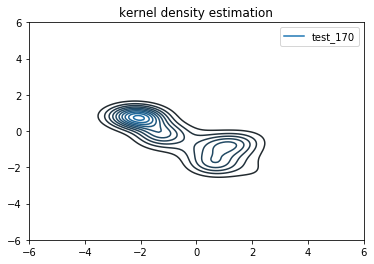

In [8]:
sns.kdeplot(full.loc[full.tag=='test_170',['iso1','iso2']],label='test_170')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.title('kernel density estimation')
plt.legend()
plt.show()

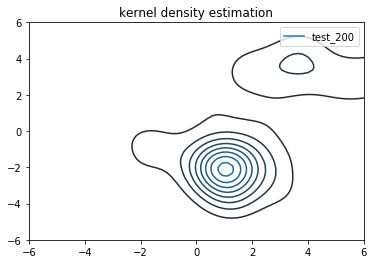

In [9]:
sns.kdeplot(full.loc[full.tag=='test_200',['iso1','iso2']],label='test_200')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.title('kernel density estimation')
plt.legend()
plt.show()

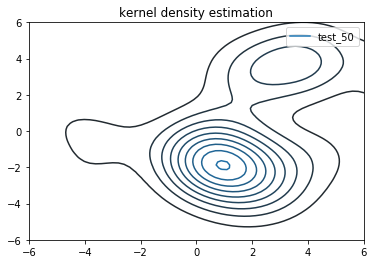

In [10]:
sns.kdeplot(full.loc[full.tag=='test_50',['iso1','iso2']],label='test_50')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.title('kernel density estimation')
plt.legend()
plt.show()

# one class svm

In [0]:
train = full.loc[full.tag == 'train']
test_50 = full.loc[full.tag == 'test_50']

In [12]:
ocsvm = OneClassSVM(nu=0.01).fit(test_50[['iso1','iso2']])
train['like'] = ocsvm.predict(train[['iso1','iso2']])
train['like'].value_counts()

-1    3286
 1    1235
Name: like, dtype: int64

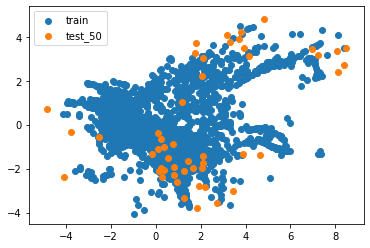

In [13]:
plt.scatter(train['iso1'],train['iso2'],label='train')
plt.scatter(test_50['iso1'],test_50['iso2'],label='test_50')
plt.legend()
plt.show()

跟50筆資料相似的部份加大權重去訓練


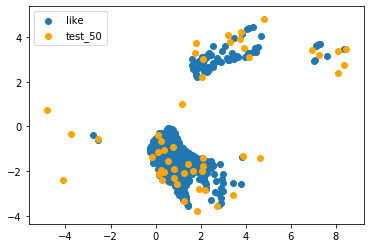

In [17]:
like_point = train.loc[train.like == 1]
plt.scatter(like_point['iso1'],like_point['iso2'],label='like')
plt.scatter(test_50['iso1'],test_50['iso2'],label='test_50',color='orange')
print('跟50筆資料相似的部份加大權重去訓練')
plt.legend()
plt.show()